### Importing libraries

In [63]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from tqdm import tqdm

###  Importing dataset

In [64]:
data = pd.read_csv('preprocessed_data.csv')

In [65]:
data.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


###   Splitting data into Train and cross validation(or test): Stratified Sampling

In [66]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y,random_state=42) # since we are using grid search no need of extra cross validation data
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train) 

###  Make Data Model Ready: encoding eassay(text feature)


####  Bag Of Words

In [68]:
vectorizer_bow = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer_bow.fit(X_train['essay'].values)  #fitting

X_train_essay_bow = vectorizer_bow.transform(X_train['essay'].values) 
#X_cv_essay_bow = vectorizer_bow.transform(X_cv['essay'].values)    # tranform 
X_test_essay_bow = vectorizer_bow.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
#print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*40)

After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)


####  TFIDF vectorizer

In [69]:
tfidfvectorizer = TfidfVectorizer(min_df=10,max_features=5000)
text_tfidf = tfidfvectorizer.fit(X_train['essay'].values) #fitting

X_train_essay_tfidf =tfidfvectorizer.transform(X_train['essay'].values) 
#X_cv_essay_tfidf =tfidfvectorizer.transform(X_cv['essay'].values)  #transform
X_test_essay_tfidf =tfidfvectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
#print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*40)

After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)


###  Make Data Model Ready: categorical features

####  encoding categorical features: School State

In [70]:
vectorizer_state = CountVectorizer()
vectorizer_state.fit(X_train['school_state'].values) # fitting

X_train_state_ohe = vectorizer_state.transform(X_train['school_state'].values)
#X_cv_state_ohe = vectorizer_state.transform(X_cv['school_state'].values)  #transform
X_test_state_ohe = vectorizer_state.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
#print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print("="*40)

After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)


#### encoding categorical features: teacher_prefix

In [71]:
vectorizer_prefix= CountVectorizer()
vectorizer_prefix.fit(X_train['teacher_prefix'].values) # fitting 

X_train_teacher_ohe = vectorizer_prefix.transform(X_train['teacher_prefix'].values)
#X_cv_teacher_ohe = vectorizer_prefix.transform(X_cv['teacher_prefix'].values)  #transform
X_test_teacher_ohe = vectorizer_prefix.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
#print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print("="*40)

After vectorizations
(73196, 5) (73196,)
(36052, 5) (36052,)


####   encoding categorical features: project_grade_category

In [72]:
vectorizer_grade = CountVectorizer()
vectorizer_grade.fit(X_train['project_grade_category'].values) # fitting 

X_train_grade_ohe = vectorizer_grade.transform(X_train['project_grade_category'].values)
#X_cv_grade_ohe = vectorizer_grade.transform(X_cv['project_grade_category'].values)  #transform
X_test_grade_ohe = vectorizer_grade.transform(X_test['project_grade_category'].values)


print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
#print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print("="*40)

After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)


####  encoding categorical features: clean_categories	

In [73]:
vectorizer_category = CountVectorizer()
vectorizer_category.fit(X_train['clean_categories'].values) # fitting 

X_train_category_ohe = vectorizer_category.transform(X_train['clean_categories'].values)
#X_cv_category_ohe = vectorizer.transform(X_cv['clean_categories'].values)   #transform
X_test_category_ohe = vectorizer_category.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_category_ohe.shape, y_train.shape)
#print(X_cv_category_ohe.shape, y_cv.shape)
print(X_test_category_ohe.shape, y_test.shape)
print("="*40)

After vectorizations
(73196, 9) (73196,)
(36052, 9) (36052,)


#####  encoding categorical features: 	clean_subcategories

In [74]:
vectorizer_sub = CountVectorizer()
vectorizer_sub.fit(X_train['clean_subcategories'].values) # fitting

X_train_subcategory_ohe = vectorizer_sub.transform(X_train['clean_subcategories'].values)
#X_cv_subcategory_ohe = vectorizer_sub.transform(X_cv['clean_subcategories'].values)  #transform
X_test_subcategory_ohe = vectorizer_sub.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_subcategory_ohe.shape, y_train.shape)
#print(X_cv_subcategory_ohe.shape, y_cv.shape)
print(X_test_subcategory_ohe.shape, y_test.shape)
print("="*40)

After vectorizations
(73196, 30) (73196,)
(36052, 30) (36052,)


###  Encoding numerical features

#### encoding numerical feature :price

In [75]:
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(1,-1)) #fitting

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
#X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1)) #transform
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

X_train_price_norm =X_train_price_norm.reshape(-1,1)
#X_cv_price_norm =X_cv_price_norm.reshape(-1,1)
X_test_price_norm=X_test_price_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
#print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


####  encoding numerical features:teacher_number_of_previously_posted_projects	

In [76]:
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)) #transform

X_train_submission_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
#X_cv_submission_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))  #transform
X_test_submission_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_submission_norm =X_train_submission_norm .reshape(-1,1)
#X_cv_submission_norm =X_cv_submission_norm .reshape(-1,1)
X_test_submission_norm=X_test_submission_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_submission_norm.shape, y_train.shape)
#print(X_cv_submission_norm.shape, y_cv.shape)
print(X_test_submission_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


###   Concatinating all the features

##### SET-1

Set 1: categorical, numerical features + preprocessed_eassay (BOW)

In [77]:
from scipy.sparse import hstack
X_tr_set_one = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,X_train_category_ohe,X_train_subcategory_ohe,X_train_submission_norm )).tocsr()
#X_cr_set_one= hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,X_cv_category_ohe,X_cv_subcategory_ohe,X_cv_submission_norm)).tocsr()
X_te_set_one = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,X_test_category_ohe,X_test_subcategory_ohe,X_test_submission_norm)).tocsr()

In [78]:
print("SHAPE OF TRAIN AND TEST AFTER STACKING")
print(X_tr_set_one.shape)
print(X_te_set_one.shape)

SHAPE OF TRAIN AND TEST AFTER STACKING
(73196, 5101)
(36052, 5101)


#####  SET-2


Set 2: categorical, numerical features + preprocessed_eassay (TFIDF)

In [79]:
from scipy.sparse import hstack
X_tr_set_two = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,X_train_category_ohe,X_train_subcategory_ohe,X_train_submission_norm )).tocsr()
#X_cr_set_two= hstack((X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,X_cv_category_ohe,X_cv_subcategory_ohe,X_cv_submission_norm)).tocsr()
X_te_set_two = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,X_test_category_ohe,X_test_subcategory_ohe,X_test_submission_norm)).tocsr()


In [80]:
print("SHAPE OF TRAIN AND TEST AFTER STACKING")
print(X_tr_set_two.shape)
print(X_te_set_two.shape)

SHAPE OF TRAIN AND TEST AFTER STACKING
(73196, 5101)
(36052, 5101)


###  MULTINOMIAL NAIVE BAYES USING GRID SEARCH CROSS VALIDATION (SET - 1)

In [81]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model=MultinomialNB(class_prior=[0.5,0.5])
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}
clf=GridSearchCV(model,param,scoring='roc_auc',cv=10,return_train_score=True) # running 10 fold cross validation grid search
clf.fit(X_tr_set_one,y_train) #fitting
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [82]:
print('Best score: ',clf.best_score_)
print('alpha value with best score: ',clf.best_params_)
print('='*40)

Best score:  0.6899221164273422
alpha value with best score:  {'alpha': 1e-05}


#### plotting hyperparameter v/s auc

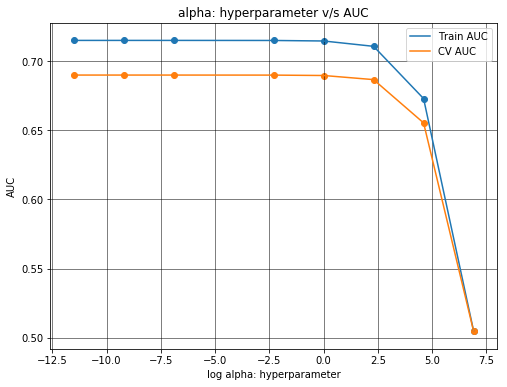

In [83]:
log_param=[]
for i in param['alpha']:  # converting alpha into log- alpha
    log_param.append(m.log(i))
    
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(log_param, train_auc, label='Train AUC')
plt.plot(log_param, cv_auc, label='CV AUC')  
plt.scatter(log_param,train_auc)
plt.scatter(log_param,cv_auc)
plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)

#### roc plot of train and test data


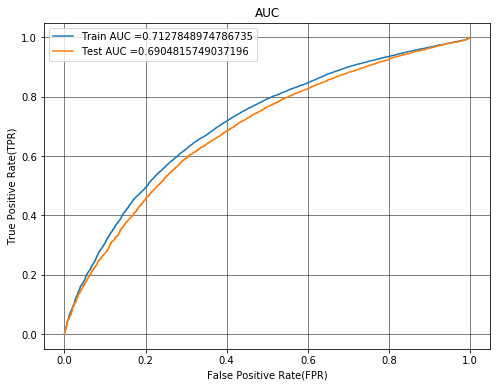

In [84]:
model_set1=MultinomialNB(alpha=1e-05,class_prior=[0.5,0.5])
model_set1.fit(X_tr_set_one,y_train)
y_train_probs = clf.predict_proba(X_tr_set_one)[:,1] # converting train and test output into probability
y_test_probs= clf.predict_proba(X_te_set_one )[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_probs) # storing values of fpr and tpr
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_probs)

plt.figure(figsize=(8,6))
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(color='black',lw=0.5)


### confusion matrix

In [85]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

#### Train data

the maximum value of tpr*(1-fpr) 0.43935211532507107 for threshold 0.539
CONFUSION MATRIX OF TRAIN DATA


[[ 7542  3541]
 [22011 40102]]


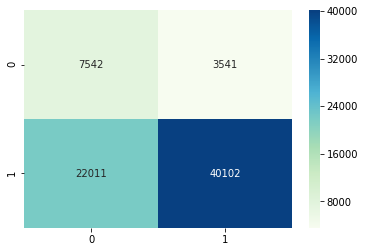

In [86]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cm=metrics.confusion_matrix(y_train,predict_with_best_t(y_train_probs, best_t))  # https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("CONFUSION MATRIX OF TRAIN DATA")
print("\n")
print(cm)
sns.heatmap(cm, annot=True, fmt='d',cmap='GnBu')

####  Test data

the maximum value of tpr*(1-fpr) 0.41765345104579243 for threshold 0.604
CONFUSION MATRIX OF TEST DATA


[[ 3624  1835]
 [11346 19247]]


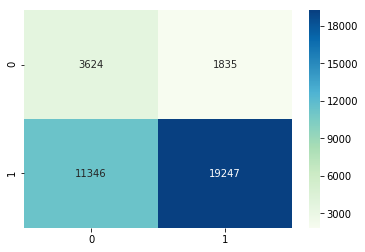

In [87]:
best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
cm=metrics.confusion_matrix(y_test,predict_with_best_t(y_test_probs, best_t))
  
print("CONFUSION MATRIX OF TEST DATA")
print('\n')
print(cm)
sns.heatmap(cm, annot=True, fmt='d',cmap='GnBu')

### MULTINOMIAL NAIVE BAYES USING GRID SEARCH CROSS VALIDATION (SET - 2)

In [88]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model=MultinomialNB(class_prior=[0.5,0.5])
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}
clf=GridSearchCV(model,param,scoring='roc_auc',cv=10,return_train_score=True) # running 10 fold cross validation grid search
clf.fit(X_tr_set_two,y_train) #fitting
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [89]:
print('Best score: ',clf.best_score_)
print('alpha value with best score: ',clf.best_params_)
print('='*40)

Best score:  0.6731629803905477
alpha value with best score:  {'alpha': 1e-05}


#### plotting hyperparameter v/s auc

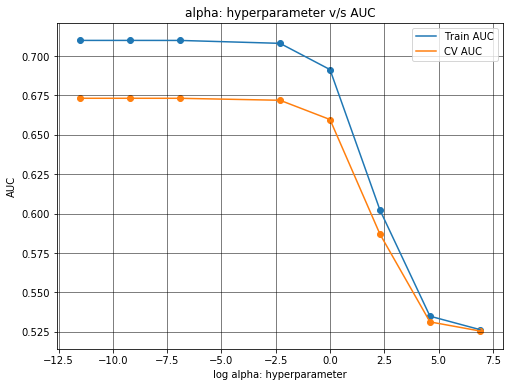

In [92]:
log_param=[]
for i in param['alpha']:  # converting alpha into log- alpha
    log_param.append(m.log(i))
    
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(log_param, train_auc, label='Train AUC')
plt.plot(log_param, cv_auc, label='CV AUC')  
plt.scatter(log_param,train_auc)
plt.scatter(log_param,cv_auc)
plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)

#### roc plot of train and test data

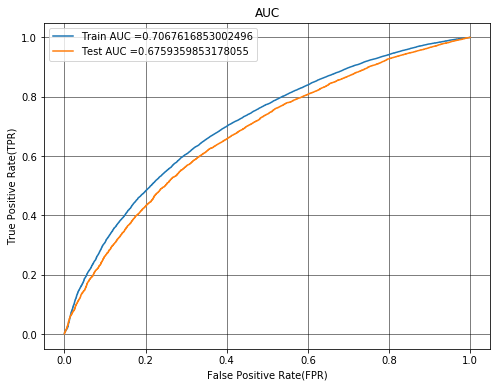

In [93]:
model_set2=MultinomialNB(alpha=1e-05,class_prior=[0.5,0.5])
model_set2.fit(X_tr_set_two,y_train)
y_train_probs = clf.predict_proba(X_tr_set_two)[:,1] # converting train and test output into probability
y_test_probs= clf.predict_proba(X_te_set_two )[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_probs) # storing values of fpr and tpr
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_probs)

plt.figure(figsize=(8,6))
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(color='black',lw=0.5)


### Confusion matrix

#### Train data

the maximum value of tpr*(1-fpr) 0.4275996878836346 for threshold 0.502
CONFUSION MATRIX OF TRAIN DATA


[[ 7308  3775]
 [21834 40279]]


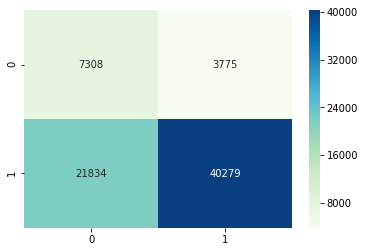

In [94]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cm=metrics.confusion_matrix(y_train,predict_with_best_t(y_train_probs, best_t))  # https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("CONFUSION MATRIX OF TRAIN DATA")
print("\n")
print(cm)
sns.heatmap(cm, annot=True, fmt='d',cmap='GnBu')

#### Test data

the maximum value of tpr*(1-fpr) 0.401206416344226 for threshold 0.511
CONFUSION MATRIX OF TEST DATA


[[ 3509  1950]
 [11498 19095]]


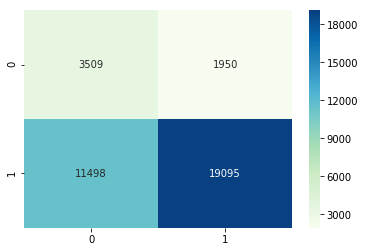

In [95]:
best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
cm=metrics.confusion_matrix(y_test,predict_with_best_t(y_test_probs, best_t))
  
print("CONFUSION MATRIX OF TEST DATA")
print('\n')
print(cm)
sns.heatmap(cm, annot=True, fmt='d',cmap='GnBu')

### Top 20 features from set-1

In [96]:
from scipy.sparse import hstack
X_tr_set_one = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,X_train_category_ohe,X_train_subcategory_ohe,X_train_submission_norm )).tocsr()
#X_cr_set_one= hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,X_cv_category_ohe,X_cv_subcategory_ohe,X_cv_submission_norm)).tocsr()
X_te_set_one = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,X_test_category_ohe,X_test_subcategory_ohe,X_test_submission_norm)).tocsr()

In [97]:
features=[]
for fe in vectorizer_bow.get_feature_names() :
    features.append(fe)
    
for fe in vectorizer_state.get_feature_names() :
    features.append(fe)
    
for fe in vectorizer_prefix.get_feature_names() :  # adding all features into list as the order of data frame
    features.append(fe)
    
for fe in vectorizer_grade.get_feature_names() :
    features.append(fe)
    
features.append("price")

for fe in vectorizer_category.get_feature_names() :
    features.append(fe)
    
for fe in vectorizer_sub.get_feature_names() :
    features.append(fe)
    
features.append("teacher_number_of_previously_posted_projects")
    

In [98]:
class_0=model_set1.feature_log_prob_[0, :].argsort()   # finding probability and making argsort for each class
class_1=model_set1.feature_log_prob_[1, :].argsort()    
#https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes

In [99]:
print("top 20 features of class_0")
print("="*80)
print(np.take(features, class_0[-20:])) # since argsort is asscending order

top 20 features of class_0
['able' 'reading' 'love' 'come' 'work' 'need' 'we' 'many' 'nannan'
 'my students' 'the' 'help' 'they' 'learn' 'not' 'classroom' 'my'
 'learning' 'school' 'students']


In [100]:
print("top 20 features of class_1")
print("="*80)
print(np.take(features, class_1[-20:]))

top 20 features of class_1
['day' 'love' 'use' 'reading' 'work' 'need' 'we' 'nannan' 'many' 'help'
 'learn' 'my students' 'not' 'they' 'the' 'classroom' 'learning' 'my'
 'school' 'students']


### Summary

In [102]:
from prettytable import PrettyTable
table=PrettyTable()
table.field_names = ["Vectorizer", "Model", "Hyper Parameter", "Test-AUC"] # # http://zetcode.com/python/prettytable/
table.add_row(["BOW", "Naive Bayes", 1e-05, 0.690])
table.add_row(["TFIDF", "Naive Bayes", 1e-05, 0.676])
print(table)

+------------+-------------+-----------------+----------+
| Vectorizer |    Model    | Hyper Parameter | Test-AUC |
+------------+-------------+-----------------+----------+
|    BOW     | Naive Bayes |      1e-05      |   0.69   |
|   TFIDF    | Naive Bayes |      1e-05      |  0.676   |
+------------+-------------+-----------------+----------+
